In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from IPython.core.display import  HTML

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# STEP 01 : Rename headers
df = df.rename(columns={'Delivery Time': 'dt', 'Sorting Time': 'st'})
df.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# STEP 02 : Check for null in dataframe (df)
pd.notnull(df)

,dt,st
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [6]:
# STEP 03 : check Co-Relation between Delivery Time and Sorting Time
df.dt.corr(df.st)

0.8259972607955326

In [7]:
Dt_Model = smf.ols('dt~st', data=df).fit()

In [8]:
Dt_Model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           3.98e-06
Time:                        16:26:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# STEP 04 : Create other model to check if there is any imporment in 'R-Squared'
            # Apply log to Sorting Time
Log_Model = smf.ols('dt~np.log(st)', data=df).fit()

In [10]:
Log_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           2.64e-06
Time:                        16:26:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# STEP 05 : Create other model to check if there is any improvement in 'R-Squared'
            # Apply log to both Delevery Time and Sorting Time
Log_Model2 = smf.ols('np.log(dt)~np.log(st)', data=df).fit()

In [12]:
Log_Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.60e-07
Time:                        16:26:31   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(st)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# STEP 06 : Compare All Models R-Squared & p>|t|
  # Since Log_Model2 has greater 'R-Squared' (0.772) compare to Log_Model & Dt_Model (0.697  & 0.682 respectively)

In [14]:
# STEP 07 : Treat Log_Model2 as Best Model and predict Delivery time
pred = Log_Model2.predict(df.iloc[:, 1])

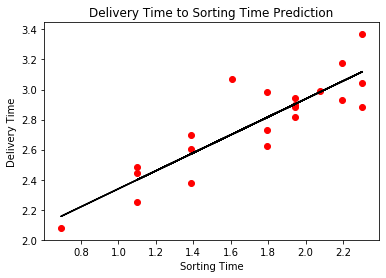

In [15]:
# STEP 08 : Visualize regression line over the scatter plot of Delivery Time & Sorting Time 
plt.scatter(np.log(df.st), np.log(df.dt), color='red'); plt.plot(np.log(df.st), pred, color='black');
plt.xlabel('Sorting Time'); plt.ylabel('Delivery Time'); plt.title('Delivery Time to Sorting Time Prediction');
